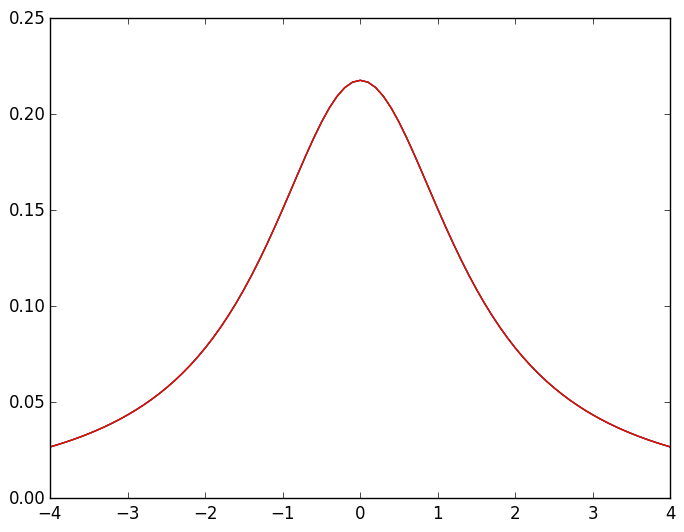

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb466e78ef0>

In [2]:
using quantumoptics
using collectivespins
using PyPlot

Nmax_cavitymodes = 10

delta_c_range = [-4:0.1:4;]
eta = 0.7
kappa = 1.5

T = Float64[0:1.:100;];

basis_cavity = FockBasis(Nmax_cavitymodes)
a = SparseOperator(destroy(basis_cavity))
at = SparseOperator(create(basis_cavity))
n = SparseOperator(number(basis_cavity))
psi0 = fockstate(basis_cavity, 0)

H0 = eta*(a + at)
J = [sqrt(2*kappa)*a]
exp_n = Float64[]
exp_n2 = Float64[]

for delta_c=delta_c_range
    H = H0 + delta_c*n 
    rho_ss = steadystate.master(H, J; eps=1e-5)
    push!(exp_n, real(expect(n, rho_ss)))

    cavity = CavityMode(delta_c, eta, kappa, Nmax_cavitymodes)
    #n = number(collectivespins.quantum.basis(cavity))
    H2 = collectivespins.Hamiltonian(cavity)
    Gamma2, J2 = collectivespins.JumpOperators(cavity)
    rho_ss = steadystate.master(H2, J2; Gamma=Gamma2, eps=1e-5)
    push!(exp_n2, real(expect(n, rho_ss)))
end
    


function S_empty(delta, eta, kappa)
    #return 2*kappa*eta^2/(delta^2 + kappa^2)
    return eta^2/(delta^2 + kappa^2)
end

exp_n_analytic = [S_empty(delta, eta, kappa) for delta=delta_c_range]

plot(delta_c_range, exp_n)
plot(delta_c_range, exp_n2)
plot(delta_c_range, exp_n_analytic)

In [ ]:
using quantumoptics
using collectivespins
using PyPlot

Nmax_cavitymodes = 5

delta_c_range = [-0.5:0.01:0.5;]
eta = 0.01
kappa = 1.
gamma = 0.0
g = 0.1

T = [0.,999.,1000.]


basis_cavity = FockBasis(Nmax_cavitymodes)
a = SparseOperator(destroy(basis_cavity))
at = SparseOperator(create(basis_cavity))
n = SparseOperator(number(basis_cavity))


basis_spin = SpinBasis(1//2)
sx = SparseOperator(sigmax(basis_spin))
sy = SparseOperator(sigmay(basis_spin))
sz = SparseOperator(sigmaz(basis_spin))
sp = SparseOperator(sigmap(basis_spin))
sm = SparseOperator(sigmam(basis_spin))


basis = compose(basis_cavity, basis_spin)

a_ = embed(basis, 1, a)
at_ = embed(basis, 1, at)
n_ = embed(basis, 1, n)

sx_ = embed(basis, 2, sx)
sy_ = embed(basis, 2, sy)
sz_ = embed(basis, 2, sz)
sp_ = embed(basis, 2, sp)
sm_ = embed(basis, 2, sm)


psi0_cavity = fockstate(basis_cavity, 0)
psi0_spin = basis_ket(basis_spin, 2)
psi0 = tensor(psi0_cavity, psi0_spin)


H0 = eta*(a + at)
J = [sqrt(kappa)*a]

exp_n_cavity = Float64[]
for delta_c=delta_c_range
    H = H0 + delta_c*n 
    rho_ss = steadystate.master(H, J; eps=1e-5)
    push!(exp_n_cavity, real(expect(n, rho_ss)))
end


H0 = eta*(a_ + at_) + g*(at_*sm_ + a_*sp_)
J = [sqrt(kappa)*a_, sqrt(gamma)*sm_]
Jabc = [sqrt(kappa)*a_, sqrt(gamma)*sm_]

exp_n = Float64[]
exp_n_ss = Float64[]
for delta_c=delta_c_range
    #println(delta_c)
    H = H0 + delta_c*n_ + 0.5*delta_c*sz_
    rho_ss = steadystate.master(H, J; eps=1e-5)
    push!(exp_n_ss, real(expect(n_, rho_ss)))
    
#     tout, rho_t = timeevolution.master(T, psi0, H, J)
#     rho_ss = rho_t[end]
#     println(tracedistance(rho_ss, rho_t[2]))
#     push!(exp_n, real(expect(n_, rho_ss)))
end

plot(delta_c_range, exp_n_cavity)
plot(delta_c_range, exp_n_ss)
# plot(delta_c_range, exp_n_ss)

In [ ]:
using quantumoptics
using collectivespins
using PyPlot

Nmax_cavitymodes = 5
N_spins = 2

delta_c_range = [-0.5:0.01:0.5;]
eta = 0.01
kappa = 1.
gamma = 0.0
g = 0.1

T = [0.,999.,1000.]

spins = SpinCollection(geometry.chain(0.9, N_spins), e_dipole, delta_a, gamma)
cavity = CavityMode(delta_c, kappa, Nmax_cavitymodes)


basis_cavity = FockBasis(Nmax_cavitymodes)
a = SparseOperator(destroy(basis_cavity))
at = SparseOperator(create(basis_cavity))
n = SparseOperator(number(basis_cavity))


basis_spin = SpinBasis(1//2)
sx = SparseOperator(sigmax(basis_spin))
sy = SparseOperator(sigmay(basis_spin))
sz = SparseOperator(sigmaz(basis_spin))
sp = SparseOperator(sigmap(basis_spin))
sm = SparseOperator(sigmam(basis_spin))


basis1 = compose(basis_cavity, basis_spin)

a_ = embed(basis1, 1, a)
at_ = embed(basis1, 1, at)
n_ = embed(basis1, 1, n)

sx_ = embed(basis1, 2, sx)
sy_ = embed(basis1, 2, sy)
sz_ = embed(basis1, 2, sz)
sp_ = embed(basis1, 2, sp)
sm_ = embed(basis1, 2, sm)


psi0_cavity = fockstate(basis_cavity, 0)
psi0_spin = basis_ket(basis_spin, 2)
psi0 = tensor(psi0_cavity, psi0_spin)

H0 = eta*(a_ + at_) + g*(at_*sm_ + a_*sp_)
J = [sqrt(kappa)*a_, sqrt(gamma)*sm_]

exp_n_ss1 = Float64[]
for delta_c=delta_c_range
    H = H0 + delta_c*n_ + 0.5*delta_c*sz_
    rho_ss = steadystate.master(H, J; eps=1e-5)
    push!(exp_n_ss1, real(expect(n_, rho_ss)))
end



basis2 = compose(basis_cavity, basis_spin, basis_spin)

a_ = embed(basis2, 1, a)
at_ = embed(basis2, 1, at)
n_ = embed(basis2, 1, n)

sx_1 = embed(basis2, 2, sx)
sy_1 = embed(basis2, 2, sy)
sz_1 = embed(basis2, 2, sz)
sp_1 = embed(basis2, 2, sp)
sm_1 = embed(basis2, 2, sm)

sx_2 = embed(basis2, 3, sx)
sy_2 = embed(basis2, 3, sy)
sz_2 = embed(basis2, 3, sz)
sp_2 = embed(basis2, 3, sp)
sm_2 = embed(basis2, 3, sm)


psi0_cavity = fockstate(basis_cavity, 0)
psi0_spin = basis_ket(basis_spin, 2)
psi0 = tensor(psi0_cavity, psi0_spin, psi0_spin)


H0 = eta*(a + at)
J = [sqrt(kappa)*a]

exp_n_cavity = Float64[]
for delta_c=delta_c_range
    H = H0 + delta_c*n 
    rho_ss = steadystate.master(H, J; eps=1e-5)
    push!(exp_n_cavity, real(expect(n, rho_ss)))
end


H0 = eta*(a_ + at_) + g/sqrt(2)*(at_*sm_1 + a_*sp_1) + g/sqrt(2)*(at_*sm_2 + a_*sp_2)
J = [sqrt(kappa)*a_, sqrt(gamma)*sm_1, sqrt(gamma)*sm_2]

exp_n_ss2 = Float64[]
for delta_c=delta_c_range
    H = H0 + delta_c*n_ + 0.5*delta_c*(sz_1 + sz_2)
    rho_ss = steadystate.master(H, J; eps=1e-5)
    push!(exp_n_ss2, real(expect(n_, rho_ss)))
end

plot(delta_c_range, exp_n_cavity)
plot(delta_c_range, exp_n_ss1)
plot(delta_c_range, exp_n_ss2)

In [ ]:
using quantumoptics
using collectivespins
using PyPlot

Nmax_cavitymodes = 3
N_spins = 1
e_dipole = [0., 0., 1.]
delta_range = [-0.5:0.01:0.5;]
eta = 0.05
kappa = 1.
gamma = 0.1
g = 0.1
exp_n_cavity = Float64[]
for delta=delta_range
    cavity = CavityMode(delta, eta, kappa, Nmax_cavitymodes)
    spins = SpinCollection(geometry.chain(0.9, N_spins), e_dipole, delta, gamma)
    system = CavitySpinCollection(cavity, spins, g)
    n = embed(collectivespins.quantum.basis(system), 1, number(collectivespins.quantum.basis(cavity)))
    H = collectivespins.Hamiltonian(system)
    Gamma, J = collectivespins.JumpOperators(system)
    rho_ss = steadystate.master(H, [J[1], J[2]]; Gamma=Gamma, eps=1e-5)
    push!(exp_n_cavity, real(expect(n, rho_ss)))
end

plot(delta_range, exp_n_cavity)

Nmax_cavitymodes = 3
N_spins = 2
e_dipole = [0., 0., 1.]
delta_range = [-0.5:0.01:0.5;]
eta = 0.05
kappa = 1.
gamma = 0.1
g = 0.1/sqrt(2)
exp_n_cavity = Float64[]
for delta=delta_range
    cavity = CavityMode(delta, eta, kappa, Nmax_cavitymodes)
    spins = SpinCollection(geometry.chain(0.7, N_spins), e_dipole, delta, gamma)
    system = CavitySpinCollection(cavity, spins, g)
    n = embed(collectivespins.quantum.basis(system), 1, number(collectivespins.quantum.basis(cavity)))
    H = collectivespins.Hamiltonian(system)
    Gamma, J = collectivespins.JumpOperators(system)
    rho_ss = steadystate.master(H, [J[1], J[2]]; Gamma=Gamma, eps=1e-5)
    push!(exp_n_cavity, real(expect(n, rho_ss)))
end

plot(delta_range, exp_n_cavity)

In [ ]:
Nmax_cavitymodes = 2
delta = 1.5
cavity = CavityMode(delta, eta, kappa, Nmax_cavitymodes)

spins = SpinCollection(geometry.chain(0.9, N_spins), e_dipole, delta, gamma)
system = CavitySpinCollection(cavity, spins, g)
n = embed(collectivespins.quantum.basis(system), 1, number(collectivespins.quantum.basis(cavity)))
H = collectivespins.Hamiltonian(system)
Gamma, J = collectivespins.JumpOperators(system)
rho_ss = steadystate.master(H, J; eps=1e-5, Gamma=Gamma);



In [ ]:
println(H)

In [ ]:
using quantumoptics
using collectivespins
using PyPlot

Nmax_cavitymodes = 2
N_spins = 1

delta = 1.5
eta = 0.01
kappa = 1.
gamma = 0.0
g = 0.1


basis_cavity = FockBasis(Nmax_cavitymodes)
a = SparseOperator(destroy(basis_cavity))
at = SparseOperator(create(basis_cavity))
n = SparseOperator(number(basis_cavity))

H0 = delta*n + eta*(a+at)
# println(H0)

cavity = CavityMode(delta, eta, kappa, Nmax_cavitymodes)
H0 = collectivespins.Hamiltonian(cavity)
# println(H0)

basis_spin = SpinBasis(1//2)
sx = SparseOperator(sigmax(basis_spin))
sy = SparseOperator(sigmay(basis_spin))
sz = SparseOperator(sigmaz(basis_spin))
sp = SparseOperator(sigmap(basis_spin))
sm = SparseOperator(sigmam(basis_spin))

spins = SpinCollection(geometry.chain(0.9, N_spins), e_dipole, delta, gamma)
H0 = collectivespins.Hamiltonian(spins)
# println(H0)

H0 = delta*sz
# println(H0)

basis = compose(basis_cavity, basis_spin)

a_ = embed(basis, 1, a)
at_ = embed(basis, 1, at)
n_ = embed(basis, 1, n)

sx_ = embed(basis, 2, sx)
sy_ = embed(basis, 2, sy)
sz_ = embed(basis, 2, sz)
sp_ = embed(basis, 2, sp)
sm_ = embed(basis, 2, sm)

system = CavitySpinCollection(cavity, spins, g)
H0 = collectivespins.Hamiltonian(system)
println(H0)

H0 = delta*n_ + delta*sz_ + eta*(a_ + at_) + g*(at_*sm_ + a_*sp_)
println(H0)

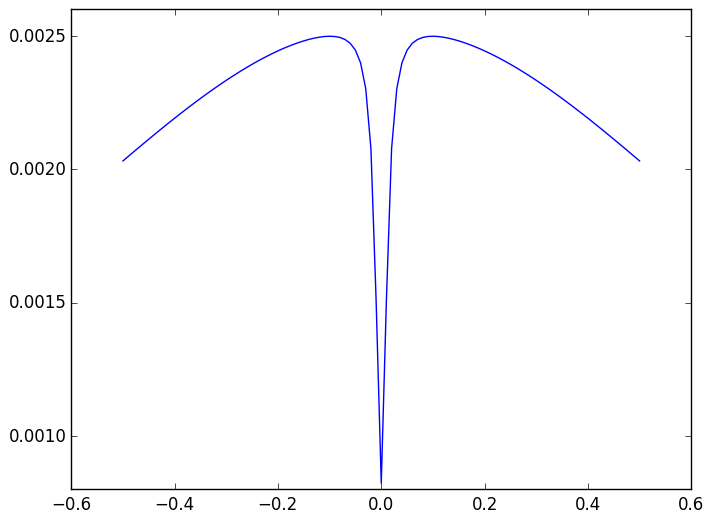

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb466b226a0>

In [9]:
using quantumoptics
using collectivespins
using PyPlot

Nmax_cavitymodes = 3
N_spins = 1
e_dipole = [0., 0., 1.]
delta_range = [-0.5:0.01:0.5;]
eta = 0.05
kappa = 1.
gamma = 0.0
g = 0.1
exp_n_cavity = Float64[]
for delta=delta_range
    cavity = CavityMode(delta, eta, kappa, Nmax_cavitymodes)
    spins = SpinCollection(geometry.chain(0.9, N_spins), e_dipole, delta, gamma)
    system = CavitySpinCollection(cavity, spins, g)
    n = embed(collectivespins.quantum.basis(system), 1, number(collectivespins.quantum.basis(cavity)))
    H = collectivespins.Hamiltonian(system)
    Gamma, J = collectivespins.JumpOperators(system)
    rho_ss = steadystate.master(H, [J[1], J[2]]; Gamma=Gamma, eps=1e-5)
    push!(exp_n_cavity, real(expect(n, rho_ss)))
end

plot(delta_range, exp_n_cavity)


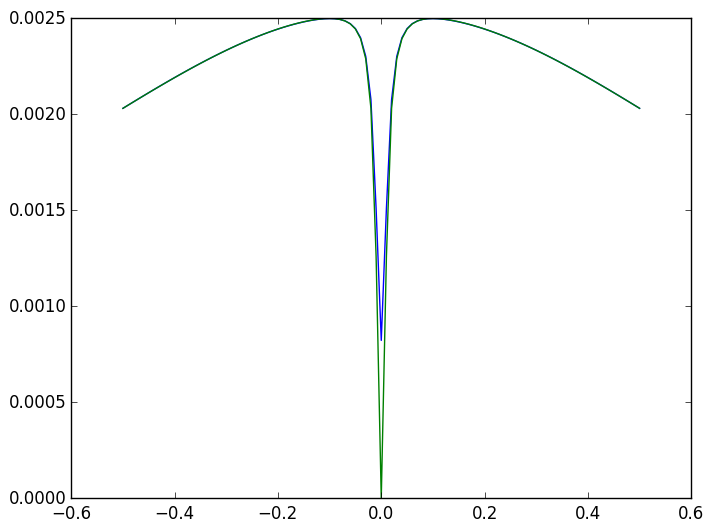

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb466a82b70>

In [10]:


function S2(N, delta, eta, g, kappa, delta_eff, gamma_eff)
    G = 1im*delta
    delta_eff = imag(G)
    gamma_eff = 2.*real(G)
    A = kappa*eta^2*(delta_eff^2 + gamma_eff^2/4)
    B = N^2 * g^4 - 2*N*g^2*(delta*delta_eff - kappa*gamma_eff/2) + (delta^2 + kappa^2)*(delta_eff^2 + gamma_eff^2/4)
    return A/B
end

exp_n_cavity_analytical = [S2(N_spins, delta, eta, g, kappa, 0., 0.) for delta=delta_range]
plot(delta_range, exp_n_cavity)
plot(delta_range, exp_n_cavity_analytical)